### Fitting a Bernoulli mixture model with known number of groups

Learning algorithm: Maximum likelihood using Expectation Maximization (EM) algorithm

In [1]:
import os, pickle
import numpy as np
from numpy import log, sum, exp, prod
from numpy.random import beta, binomial, dirichlet, uniform, gamma, seed, multinomial, gumbel, rand
from imp import reload
import matplotlib.pyplot as plt
from copy import deepcopy

os.chdir("C:\\Users\\Alexander\\Documents\\\Github\\bmm_mix")

from bernmix.utils import bmm_utils as bmm

Simulate data from data generating process:

In [2]:
#seed(12)

N = 10**4         # number of observations  
K = 3            # number of mixture components
D = 50           # dimensions / number of features     

# True states of unknown parameters:
alphas = gamma(shape=5, size=K)                            # shape parameter
p_true = dirichlet(alpha = alphas, size = 1)[0]              # mixture weights
theta_true = beta(a = .7, b = .9, size = K*D).reshape(D,K)           # success probabilities for Bernoulli distributions

In [3]:
X, Z = bmm.sample_bmm(N, p_true, theta_true)    # Generate data from mixture model

print(Z.shape)
print(X.shape)

Sampling from 50 dimensional Bernoulli mixture with 3 mixture components.
Number of random draws: 10000
(10000, 3)
(10000, 50)


Set initial values for parameters:

Run EM algorithm:

In [26]:
D = X.shape[1]
alphas = gamma(shape=5, size=K)               # shape parameters
p_0 = dirichlet(alpha = alphas, size = 1)[0]
#p_0 = np.array([1/K]*K)                                  # flat prior
theta_0 = beta(a = .7, b = 1.1, size = K*D).reshape(D,K)

logli, p_em, theta_em = bmm.mixture_EM(X = X, p_0 = p_0, theta_0 = theta_0, n_iter = 200, stopcrit = 10**(-3))

0 - delta LL.: 142013.630157642
5 - delta LL.: 3.289751475676894e-06
Stop criterion applied!
-2.9103830456733704e-11


Plot loglikelihood function:

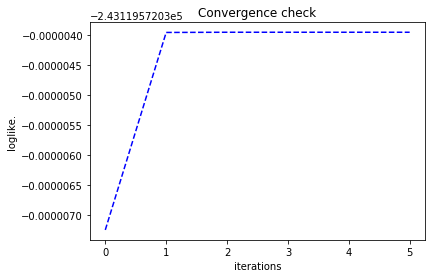

In [27]:
burn_in = 5          # leave out burn-in period for nicer plotting

plt.plot(logli[burn_in:], 'b--')
plt.title("Convergence check")
plt.xlabel('iterations')
plt.ylabel('loglike.')
plt.show()

Compare estimates with true parameters:

In [28]:
print(p_em)
print(p_true)

[0.47968499 0.21562703 0.30468798]
[0.22274888 0.30990873 0.4673424 ]


In [29]:
print(theta_em)
print(theta_true)

[[4.37786722e-02 4.44749461e-01 2.27445868e-01]
 [6.79137065e-02 2.26783957e-01 7.32296905e-01]
 [8.92894722e-01 8.78958289e-01 6.46775230e-01]
 [9.92352219e-02 6.74305163e-01 4.92304681e-02]
 [3.32039407e-01 9.10029657e-01 8.08363652e-01]
 [6.80340402e-01 2.96008125e-01 3.24015304e-01]
 [7.62479365e-01 6.04119649e-02 1.09369726e-01]
 [5.29484426e-01 6.67941730e-01 9.98030765e-01]
 [4.91645949e-01 7.73086196e-01 3.40234454e-02]
 [9.73762836e-02 7.13737929e-01 4.23019207e-01]
 [7.01919909e-01 7.10952680e-01 2.97678102e-01]
 [6.54807295e-01 8.85821477e-02 5.00833887e-01]
 [8.60169134e-01 2.61107960e-01 6.43569348e-01]
 [2.02786420e-01 2.87656163e-01 8.76304782e-02]
 [2.92639335e-01 9.87014590e-01 9.03869850e-01]
 [3.72694824e-01 2.94029373e-01 5.80013716e-01]
 [2.43027176e-01 6.61795866e-01 4.73016473e-01]
 [4.75801576e-01 4.45214453e-02 9.22468623e-01]
 [2.13546424e-01 5.24974108e-01 7.30792751e-02]
 [6.02268436e-01 2.73659848e-02 3.93846361e-02]
 [6.65438618e-01 9.10828720e-01 3.935166